## AirBNB Project
**Author**: Aidos Utegulov<br />
**Cohort**: Feb 21

Objective

Explore and visualize the dataset.
Build a linear regression model to predict the log of rental price
Generate a set of insights and recommendations that will help the business.

Data Dictionary 

1. id	Property ID
2. room_type	Type of Room in the property
3. accommodates	How many adults can this property accomodate
4. bathrooms	Number of bathrooms in the property
5. cancellation_policy	Cancellation policy of the property
6. cleaning_fee	This denotes whether the property's cleaning fee is included in the rent or not
7. instant_bookable	It indicates whether an instant booking facility is available or not
8. review_scores_rating	The review rating score of the property
9. bedrooms	Number of bedrooms in the property
10. beds	Total number of beds in the property
11. log_price	Log of the rental price of the property for a fixed period 

### Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load and review data

In [2]:
df = pd.read_csv("AirBNB.csv")

In [3]:
df.shape

(74111, 11)

In [4]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [5]:
df.tail()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000
74110,3534845,Entire home/apt,4.0,1.0,moderate,False,f,96.0,1.0,2.0,4.852030


### Check the data types of the columns for the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


### Check null values

In [7]:
df.isna().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

## **Observation**
- review_scores_rating feature contains 16722 null values
- other features contain far less null values

### Summary of the dataset.

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,74111.000,NaN,NaN,NaN,11266617.102,6081734.887,344.000,6261964.500,12254147.000,16402260.500,21230903.000
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.000,NaN,NaN,NaN,3.155,2.154,1.000,2.000,2.000,4.000,16.000
bathrooms,73908.000,NaN,NaN,NaN,1.235,0.582,0.000,1.000,1.000,1.000,8.000
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.000,NaN,NaN,NaN,94.067,7.837,20.000,92.000,96.000,100.000,100.000
bedrooms,74019.000,NaN,NaN,NaN,1.266,0.852,0.000,1.000,1.000,1.000,10.000
beds,73980.000,NaN,NaN,NaN,1.711,1.254,0.000,1.000,1.000,2.000,18.000


In [9]:
df = df.drop("id", axis = 1)

In [10]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

**Observations**
- There are outliers in the beds feature with 18 being the maximum number of beds in the property
- There are properties that can accomodate up to 16 people - a second candidate for outlier treatment

**Let's look at the values of 'object' type columns:**

In [11]:
cols_obj= df.select_dtypes(['object'])

In [12]:
for i in cols_obj.columns:
    print('Unique values in',i, 'are :')
    print(cols_obj[i].value_counts())
    print('*'*50)

Unique values in room_type are :
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64
**************************************************
Unique values in cancellation_policy are :
strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64
**************************************************
Unique values in cleaning_fee are :
True     54399
False    19708
Name: cleaning_fee, dtype: int64
**************************************************
Unique values in instant_bookable are :
f    54660
t    19451
Name: instant_bookable, dtype: int64
**************************************************


**Observations**
- The strings "True" and "False" in the cleaning_fee column can be transformed to contain 1's and 0's
- The values in the instant_bookable column are either 't' or 'f' which can also be transformed to contain 1's and 0's

## Data preprocessing

In [13]:
# we will replace missing values in every column with its medain
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

### Cleaning up cleaning fee feature

- We will replace bool values with ints

In [14]:
df["cleaning_fee"].isnull().sum()

4

In [15]:
df['cleaning_fee'].head()

0    True
1    True
2    True
3    True
4    True
Name: cleaning_fee, dtype: object

We will assume that the four null values will have False in cleaning fee feature. We will also make another series in the dataframe that represents true and false values by 1's and 0's

In [16]:
def falseFiller(x):
    if x :
        return 1
    elif x is None:
        return 0
    else:
        return 0

    

In [17]:
df['cleaning_fee_clean'] = df['cleaning_fee'].apply(falseFiller)

In [18]:
df['cleaning_fee_clean'].head()

0    1
1    1
2    1
3    1
4    1
Name: cleaning_fee_clean, dtype: int64

In [19]:
df.drop(["cleaning_fee"], axis = 1, inplace = True)

In [20]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,instant_bookable,review_scores_rating,bedrooms,beds,log_price,cleaning_fee_clean
0,Entire home/apt,3.000,1.000,strict,f,100.000,1.000,1.000,5.011,1
1,Entire home/apt,7.000,1.000,strict,t,93.000,3.000,3.000,5.130,1
2,Entire home/apt,5.000,1.000,moderate,t,92.000,1.000,3.000,4.977,1
3,Entire home/apt,4.000,1.000,flexible,f,96.000,2.000,2.000,6.620,1
4,Entire home/apt,2.000,1.000,moderate,t,40.000,0.000,1.000,4.745,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74111 non-null  float64
 2   bathrooms             74111 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   instant_bookable      74111 non-null  object 
 5   review_scores_rating  74111 non-null  float64
 6   bedrooms              74111 non-null  float64
 7   beds                  74111 non-null  float64
 8   log_price             74111 non-null  float64
 9   cleaning_fee_clean    74111 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 5.7+ MB


In [22]:
df.isnull().sum()

room_type               5
accommodates            0
bathrooms               0
cancellation_policy     8
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
cleaning_fee_clean      0
dtype: int64

### Missing value treatment

In [23]:
df['room_type'].value_counts()

Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64

In [24]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74111.000,NaN,NaN,NaN,3.155,2.154,1.000,2.000,2.000,4.000,16.000
bathrooms,74111.000,NaN,NaN,NaN,1.235,0.581,0.000,1.000,1.000,1.000,8.000
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,74111.000,NaN,NaN,NaN,94.503,6.943,20.000,93.000,96.000,99.000,100.000
bedrooms,74111.000,NaN,NaN,NaN,1.265,0.852,0.000,1.000,1.000,1.000,10.000
beds,74111.000,NaN,NaN,NaN,1.710,1.253,0.000,1.000,1.000,2.000,18.000
log_price,74111.000,NaN,NaN,NaN,4.782,0.717,0.000,4.317,4.710,5.220,7.600
cleaning_fee_clean,74111.000,NaN,NaN,NaN,0.734,0.442,0.000,0.000,1.000,1.000,1.000


In [25]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['room_type', 'cancellation_policy', 'instant_bookable'], dtype='object')

In [26]:
cat_cols = ['room_type', 'cancellation_policy']

In [27]:
for i in cat_cols:
    df[i] = df[i].astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   room_type             74106 non-null  category
 1   accommodates          74111 non-null  float64 
 2   bathrooms             74111 non-null  float64 
 3   cancellation_policy   74103 non-null  category
 4   instant_bookable      74111 non-null  object  
 5   review_scores_rating  74111 non-null  float64 
 6   bedrooms              74111 non-null  float64 
 7   beds                  74111 non-null  float64 
 8   log_price             74111 non-null  float64 
 9   cleaning_fee_clean    74111 non-null  int64   
dtypes: category(2), float64(6), int64(1), object(1)
memory usage: 4.7+ MB


Convert instant_bookable feature to 0's and 1's

In [29]:
df['instant_bookable'].value_counts()

f    54660
t    19451
Name: instant_bookable, dtype: int64

In [30]:
def convertToIntBookable(x) :
    if x == "t" :
        return 1
    elif x == "f":
        return 0
    else:
        return 0

In [31]:
df['inst_book'] = df['instant_bookable'].apply(convertToIntBookable)

In [32]:
df['inst_book'].value_counts()

0    54660
1    19451
Name: inst_book, dtype: int64

In [33]:
df.isna().sum()

room_type               5
accommodates            0
bathrooms               0
cancellation_policy     8
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
cleaning_fee_clean      0
inst_book               0
dtype: int64

now we can safely drop the instant_bookable column

In [34]:
df.drop(["instant_bookable"], axis = 1, inplace = True)

In [35]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,cleaning_fee_clean,inst_book
0,Entire home/apt,3.000,1.000,strict,100.000,1.000,1.000,5.011,1,0
1,Entire home/apt,7.000,1.000,strict,93.000,3.000,3.000,5.130,1,1
2,Entire home/apt,5.000,1.000,moderate,92.000,1.000,3.000,4.977,1,1
3,Entire home/apt,4.000,1.000,flexible,96.000,2.000,2.000,6.620,1,0
4,Entire home/apt,2.000,1.000,moderate,40.000,0.000,1.000,4.745,1,1


In [36]:
df['room_type'].mode()

0    Entire home/apt
Name: room_type, dtype: category
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']

In [37]:
Mode_Category = df['room_type'].mode()[0]

In [38]:
df['room_type'].fillna(Mode_Category, inplace=True)

In [39]:
df.isna().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     8
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
cleaning_fee_clean      0
inst_book               0
dtype: int64

In [40]:
df['cancellation_policy'].mode()

0    strict
Name: cancellation_policy, dtype: category
Categories (3, object): ['flexible', 'moderate', 'strict']

In [41]:
Policy_Mode = df['cancellation_policy'].mode()[0]

In [42]:
df['cancellation_policy'].fillna(Policy_Mode, inplace=True)

In [43]:
df.isna().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
cleaning_fee_clean      0
inst_book               0
dtype: int64

In [45]:
!pip install pandas-profiling[notebook]

ERROR: Could not find a version that satisfies the requirement requests>=2.23.0 (from pandas-profiling[notebook]) (from versions: none)
ERROR: No matching distribution found for requests>=2.23.0 (from pandas-profiling[notebook])


In [46]:
from pandas_profiling import ProfileReport

In [47]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [48]:
profile.to_file("your_report.html")

MemoryError: Unable to allocate 14.8 GiB for an array with shape (1984862880,) and data type int64

## EDA

### Univariate analysis

In [96]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [97]:
cols = df.columns

In [98]:
print(cols)

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'review_scores_rating', 'bedrooms', 'beds', 'log_price',
       'cleaning_fee_clean', 'inst_book'],
      dtype='object')


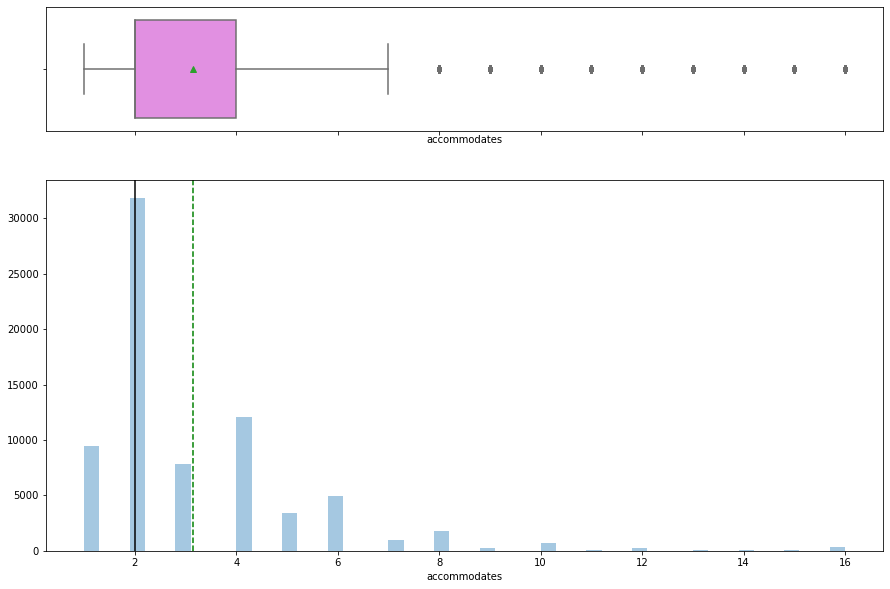

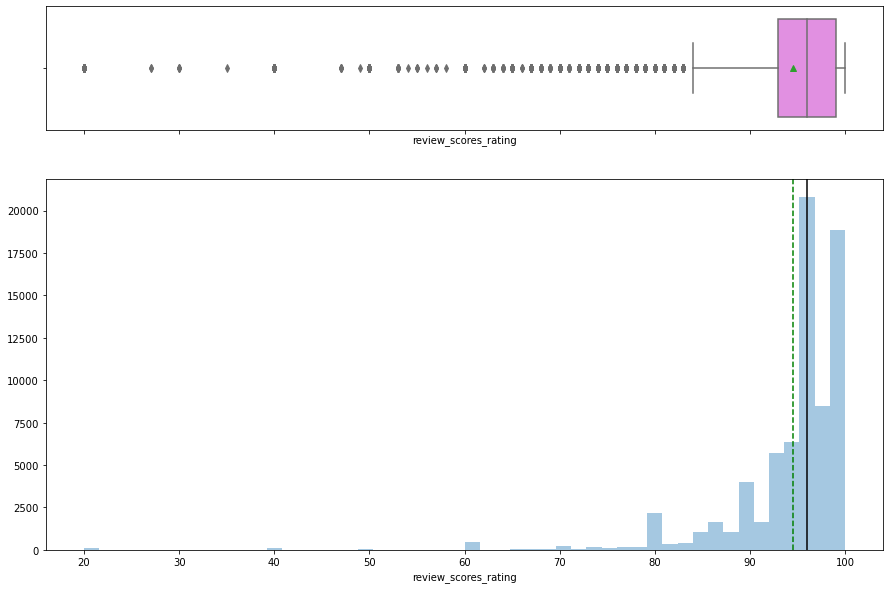

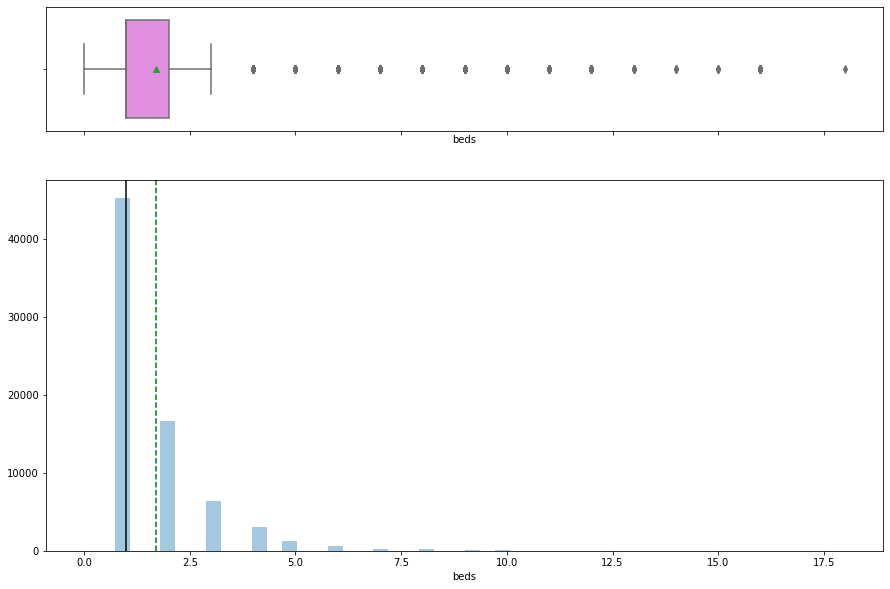

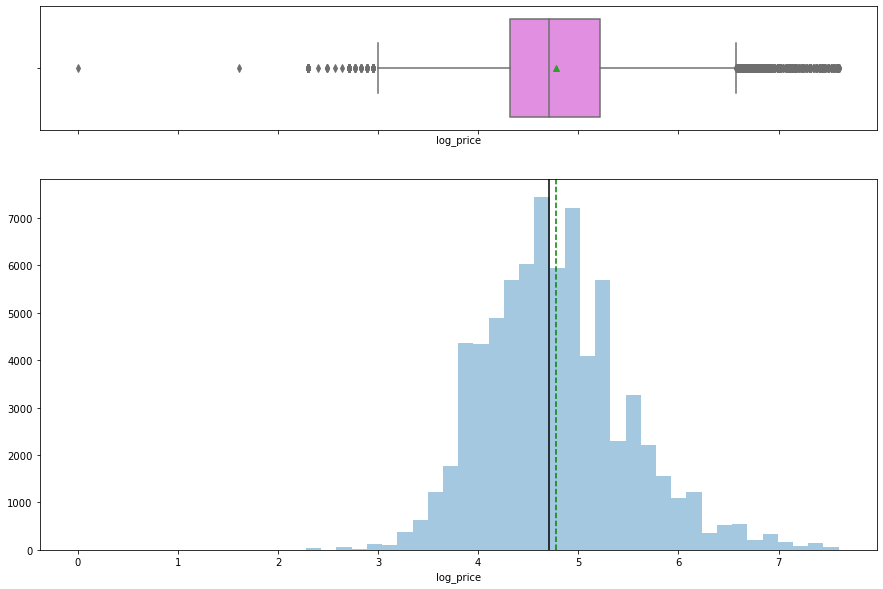

In [99]:
interesting_cols = ['accommodates', 'review_scores_rating', 'beds', 'log_price']
for col in interesting_cols:
    histogram_boxplot(df[col])

**Observations and Insights**

- accomodates column has quite a few outliers
- review_scores_rating also has quite a number of outliers
- beds feature is also a candidate for outlier treatment
- beds column's value distribution is skewed to the right
- review_scores_rating column's value distribution is skewed to the left
- log price column's value distribution look uniform

### Percentages of Categorical data on bar charts

In [100]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

In [101]:
cat_cols = ['bathrooms', 'bedrooms', 'cleaning_fee_clean', 'inst_book']

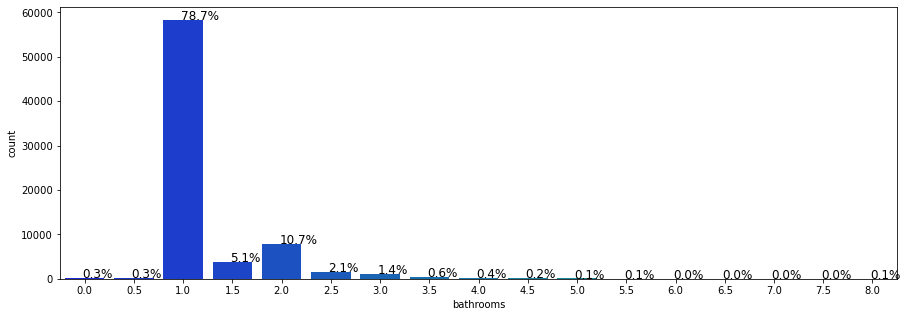

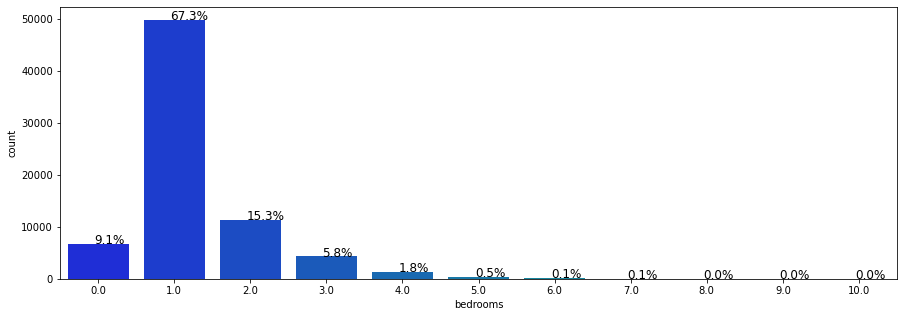

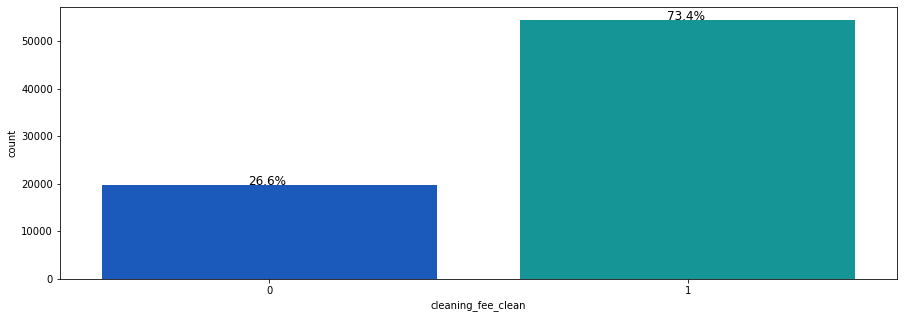

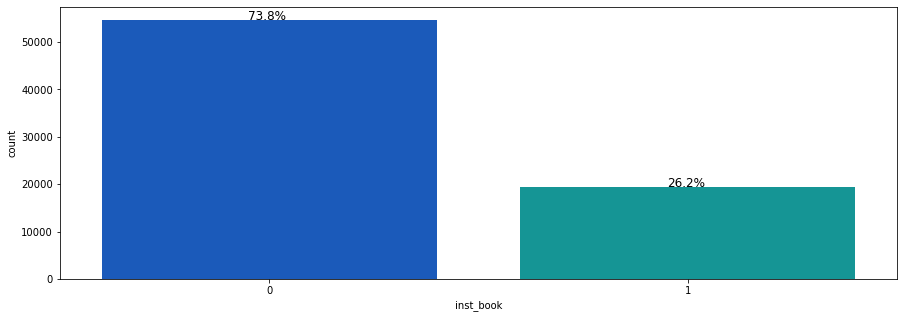

In [102]:
for col in cat_cols:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(df[col],palette='winter')
    perc_on_bar(ax,df[col])

### Countplots of categorical variables

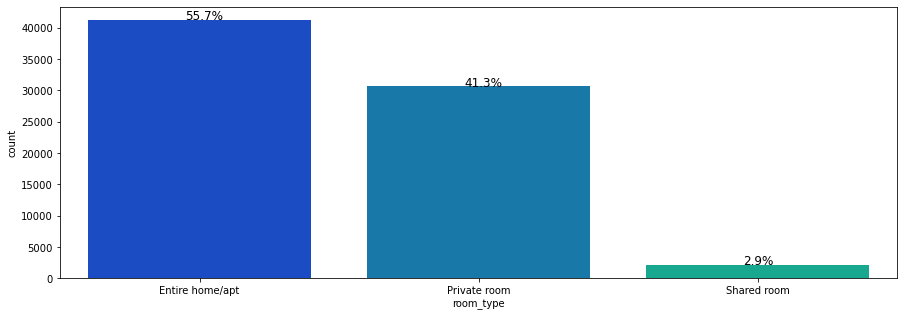

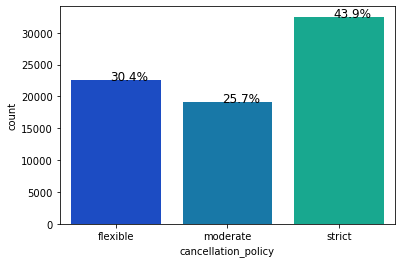

In [103]:
plt.figure(figsize=(15,5))

dummy_cols = ['room_type', 'cancellation_policy']
for col in dummy_cols:
    ax = sns.countplot(df[col],palette='winter')
    perc_on_bar(ax,df[col])

### Outlier treatment

In [104]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

In [105]:
outlier_cols = ['accommodates', 'review_scores_rating', 'beds']
for col in outlier_cols:
    df = treat_outliers(df, col)

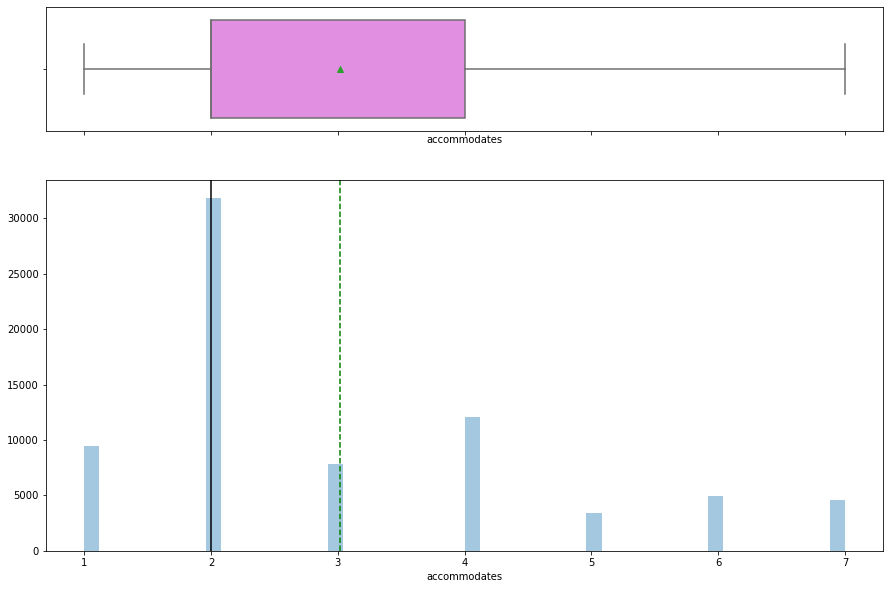

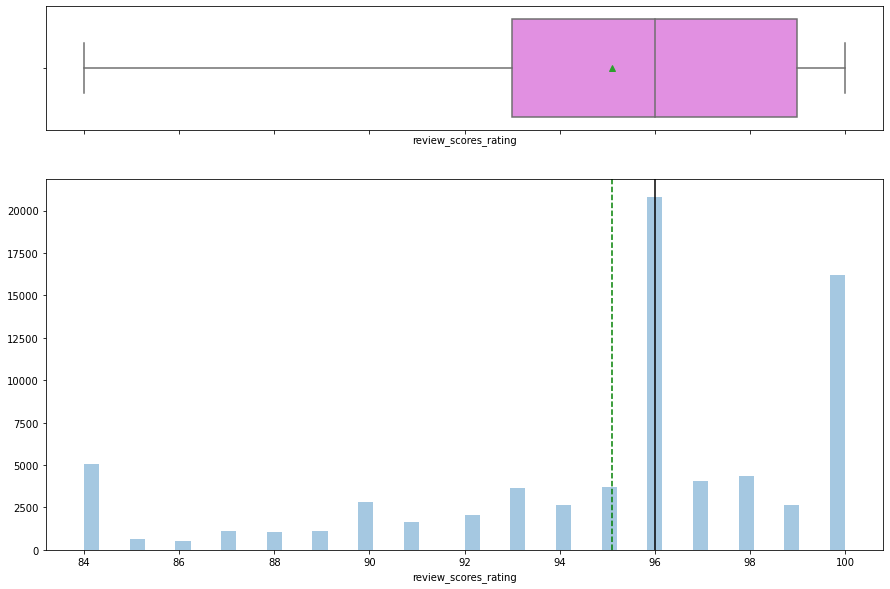

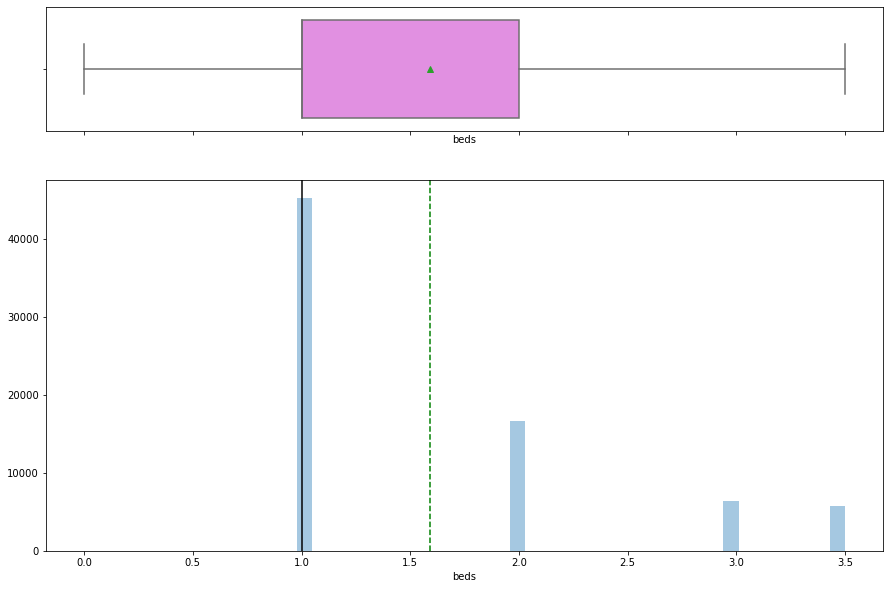

In [106]:
for col in outlier_cols:
    histogram_boxplot(df[col])

**Observations**:
- There are no more outliers in the specified columns

## Bivariate Analysis

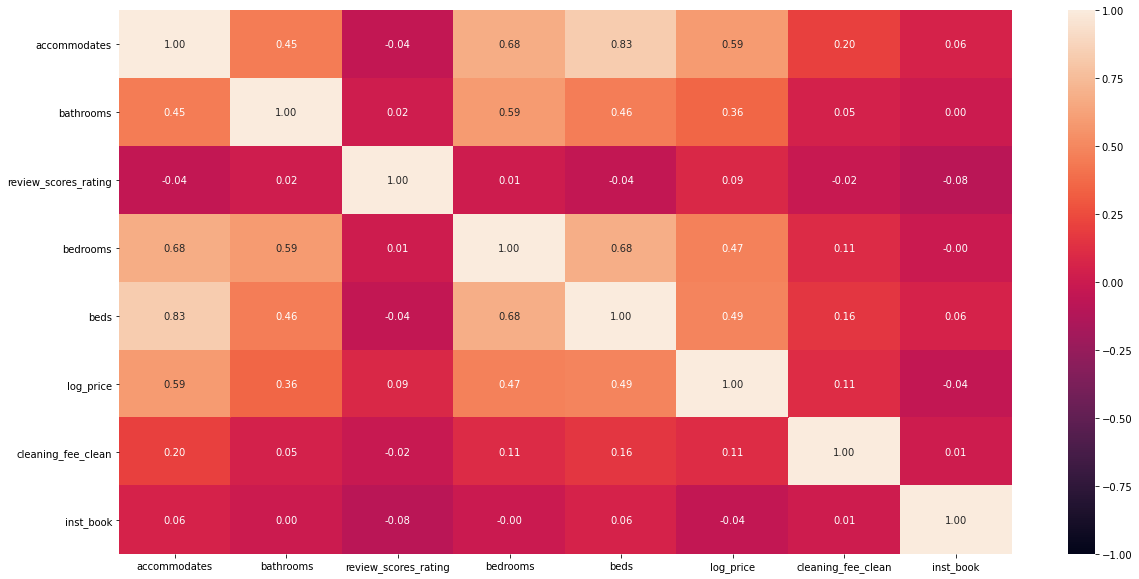

In [107]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

**Observations:**
- log_price has high correlation with following features: accomodates - 0.59, bedrooms - 0.47, 
- inst_book and review_scores_rating features seem to have very little to no correlation with the log_price feature, and could be dropped
- accomodates feature has high correlation with beds (0.83) and bedrooms(0.59), bathrooms and bedrooms have high correlation (0.68), bedrooms and beds have the same correlation. I suspect that some of these features will have high collinearity. 

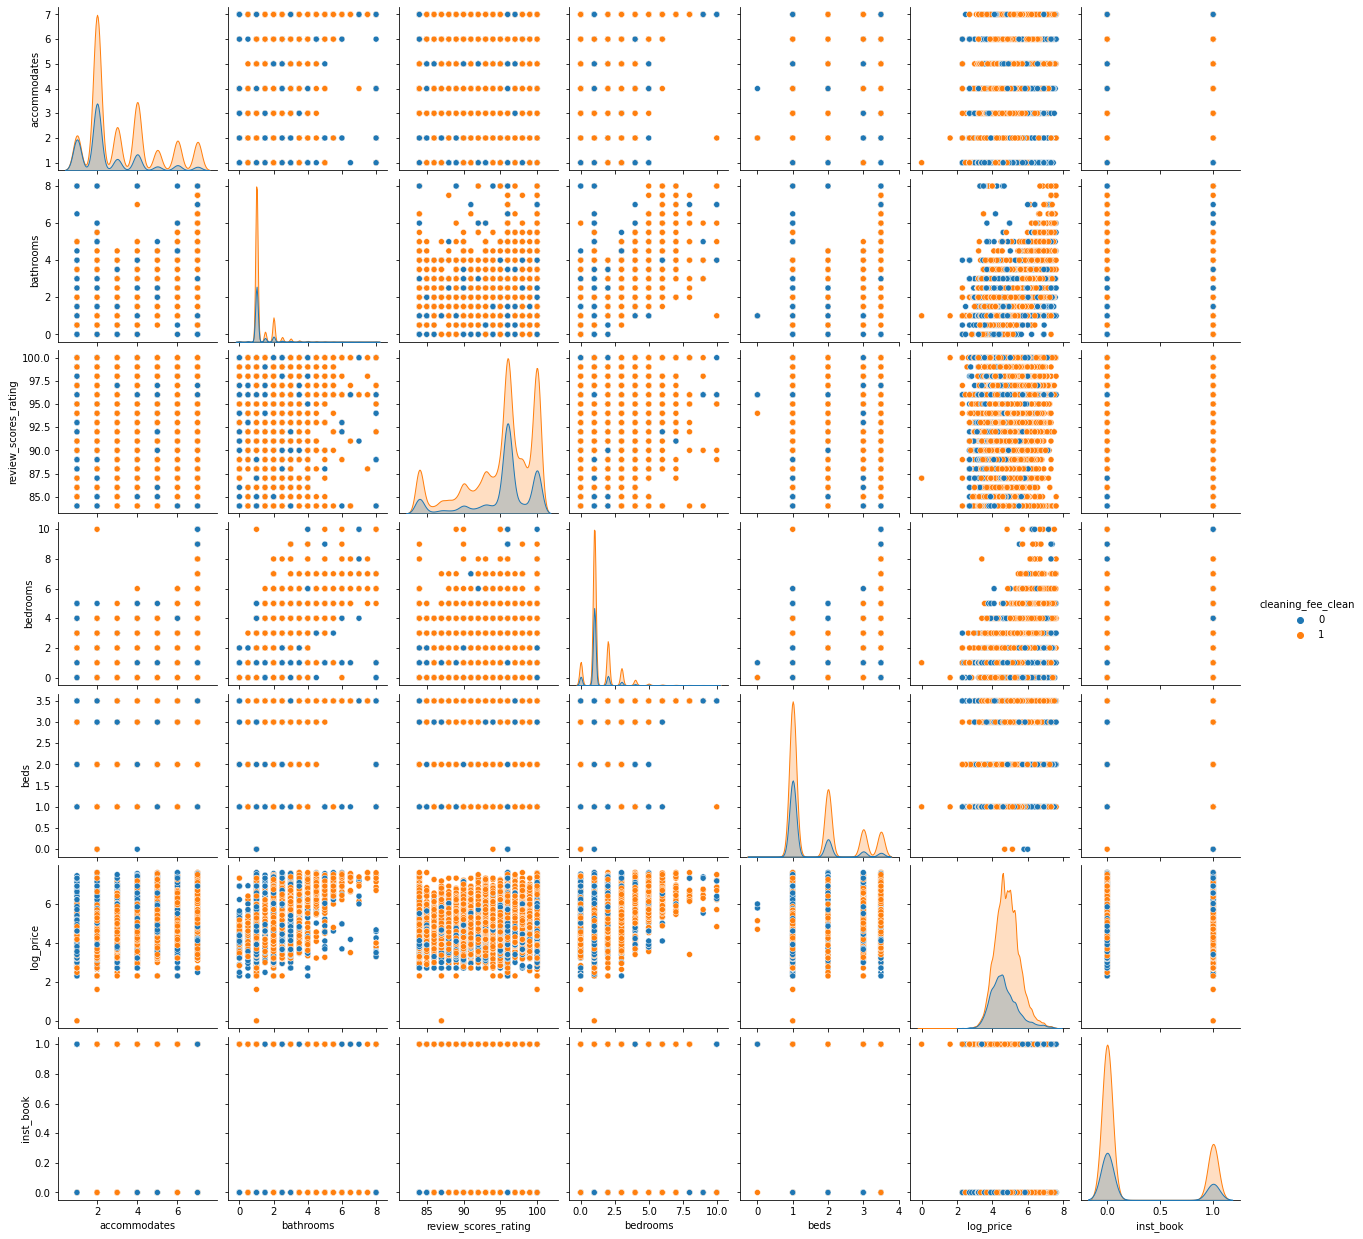

In [114]:
sns.pairplot(df,hue='cleaning_fee_clean')
plt.show()

**Observations**
- Bedrooms and bathrooms features have strong positive linear correlation
- Bedrooms and beds features seem to have a high linear correlation

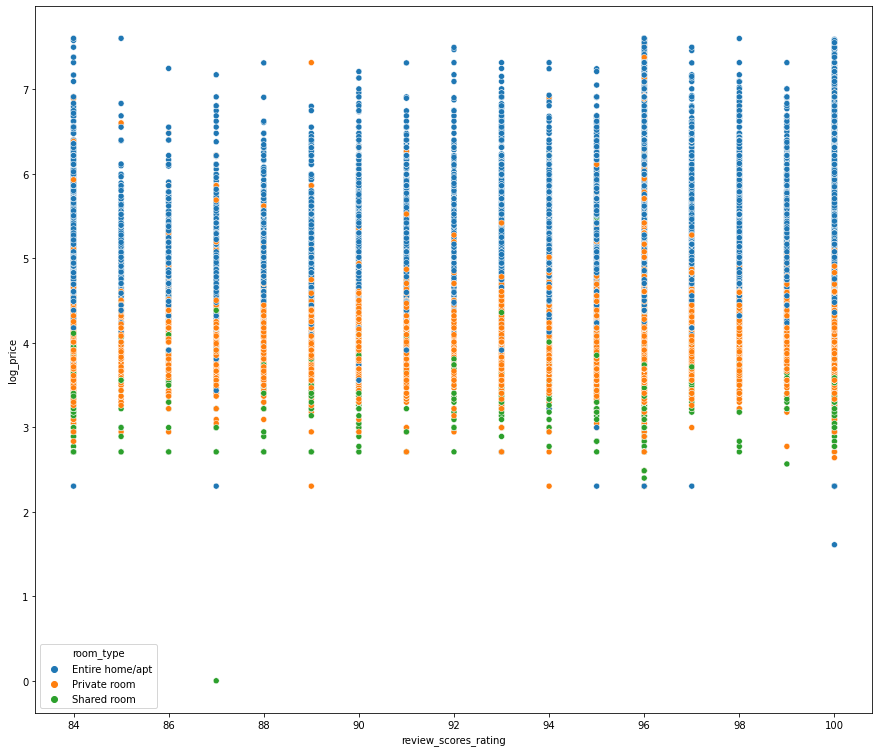

In [115]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='log_price', x='review_scores_rating', hue='room_type', data=df);

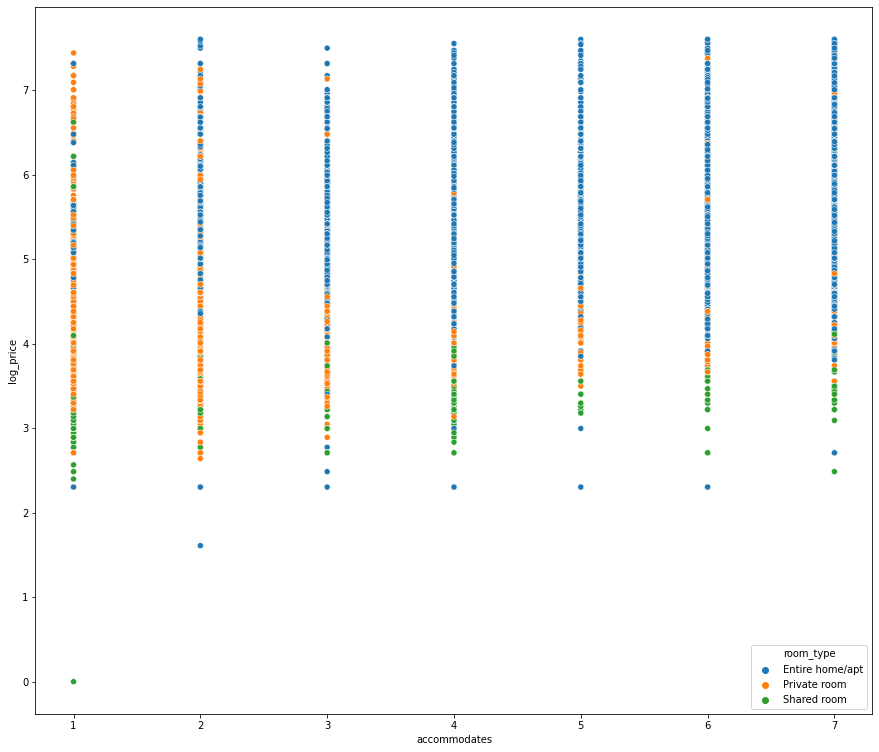

In [116]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='log_price', x='accommodates', hue='room_type', data=df);


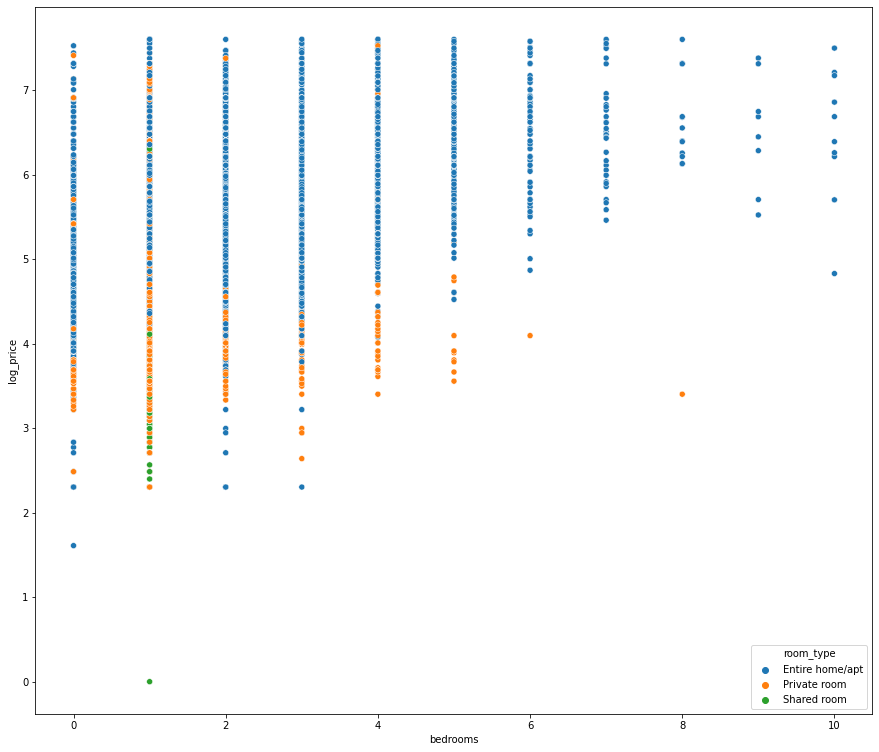

In [117]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='log_price', x='bedrooms', hue='room_type', data=df);

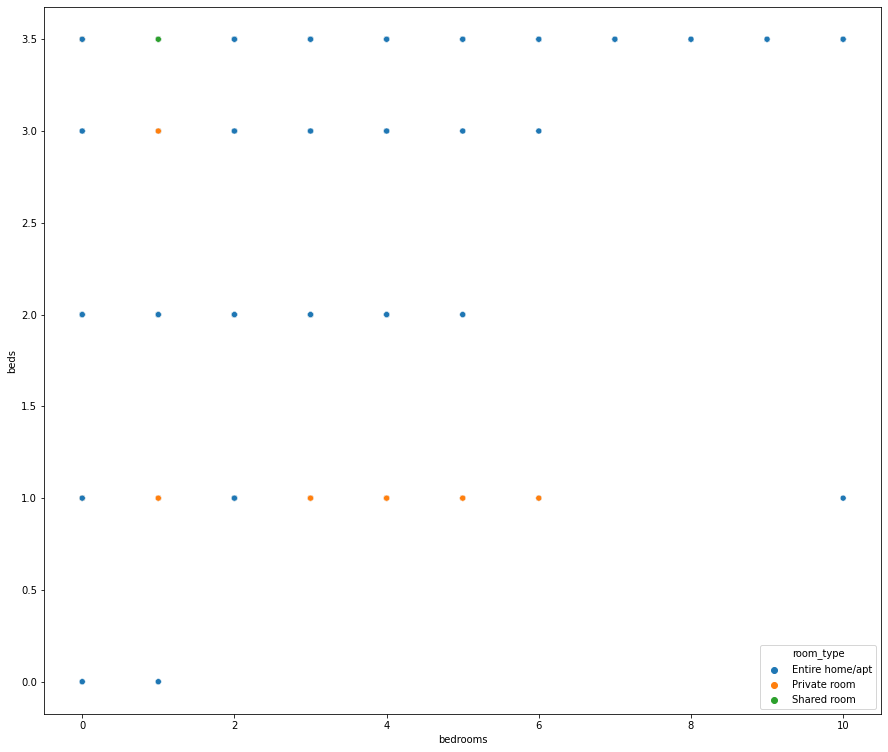

In [118]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='beds', x='bedrooms', hue='room_type', data=df);

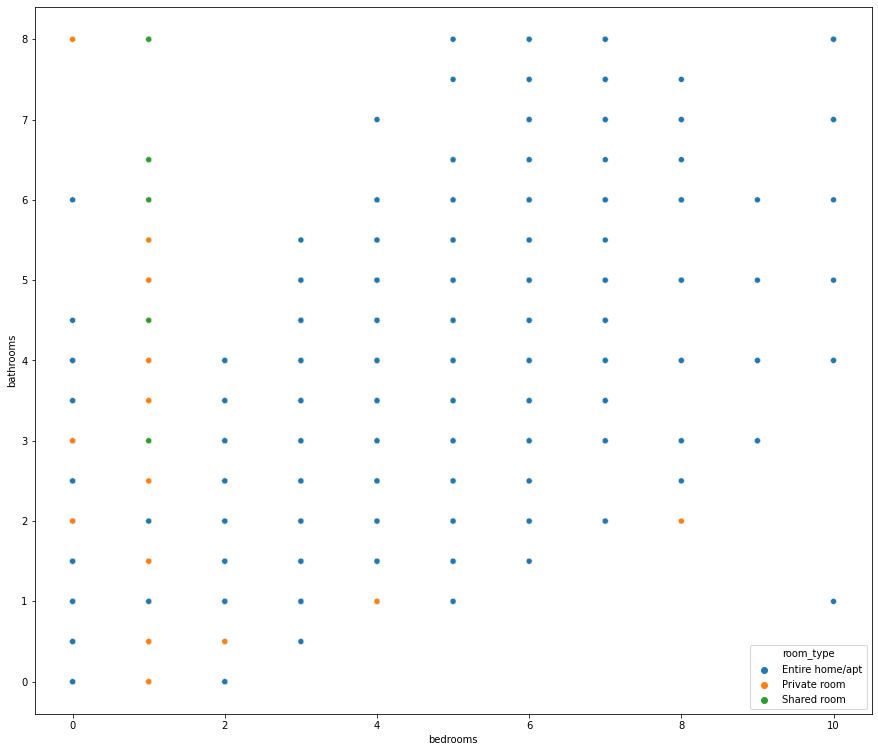

In [119]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='bathrooms', x='bedrooms', hue='room_type', data=df);

* There is collinearity between number of bedrooms and number of bathrooms, which seems logical - as the number of bedrooms increases, so does the number of bathrooms. One of the features could be dropped

### Get dummies for categorical columns and drop insignificant columns

In [120]:
df = pd.get_dummies(df, columns=['room_type', 'cancellation_policy'], drop_first = True)

In [121]:
df.columns

Index(['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'log_price', 'cleaning_fee_clean', 'inst_book',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict'],
      dtype='object')

In [123]:
# drop inst_book column
df.drop(['inst_book'], axis = 1, inplace = True)

In [124]:
df.columns

Index(['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'log_price', 'cleaning_fee_clean', 'room_type_Private room',
       'room_type_Shared room', 'cancellation_policy_moderate',
       'cancellation_policy_strict'],
      dtype='object')

In [125]:
# drop review_scores_rating column
df.drop(['review_scores_rating'], axis = 1, inplace = True)

In [126]:
df.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'log_price',
       'cleaning_fee_clean', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict'],
      dtype='object')

## Split Data

In [127]:
# lets build our linear model
# independant variables
X = df.drop(['log_price'], axis=1)
# the dependent variable
y = df[['log_price']]

In [128]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [129]:
X_train.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee_clean,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
64132,1.000,2.000,1.000,1.000,0,1,0,0,1
54279,2.000,1.000,1.000,1.000,1,1,0,1,0
874,2.000,1.000,1.000,1.000,1,0,0,0,0
9289,2.000,1.000,1.000,2.000,0,1,0,0,0
26240,5.000,1.000,0.000,3.000,1,0,0,0,1


In [136]:
y_train.value_counts()

log_price
5.011        1896
4.605        1889
4.317        1429
3.912        1357
5.298        1352
             ... 
6.387           1
6.402           1
6.413           1
6.422           1
0.000           1
Length: 696, dtype: int64

## Fit Linear Model

In [130]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [131]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.09722601016073226
The coefficient for bathrooms is 0.15514971835050365
The coefficient for bedrooms is 0.14674234511190223
The coefficient for beds is -0.05406890939985606
The coefficient for cleaning_fee_clean is -0.07322169388628441
The coefficient for room_type_Private room is -0.622976217301833
The coefficient for room_type_Shared room is -1.1156541818281351
The coefficient for cancellation_policy_moderate is -0.05451415304759642
The coefficient for cancellation_policy_strict is -0.015003550589815331


In [132]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.560248028794937


**Lets look at model performances**

In [133]:
# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [134]:
# Checking model performance on train set
print('Training Performance\n')
print(model_perf(regression_model, X_train, y_train))

Training Performance

   RMSE   MAE  MAPE   R^2  Adjusted R^2
0 0.501 0.380   inf 0.514         0.514


**Observations**
- The model is doing horribly with accuracy of only 51%, let's try removing multicollinearity

## Removing Multicollinearity
To remove multicollinearity
  1. Drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 5

In [137]:
# to compute VIF, we first have to add a constant column having value 1 to our input variables

X1 = X.copy()
X1['const'] = 1
X1.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee_clean,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,const
0,3.000,1.000,1.000,1.000,1,0,0,0,1,1
1,7.000,1.000,3.000,3.000,1,0,0,0,1,1
2,5.000,1.000,1.000,3.000,1,0,0,1,0,1
3,4.000,1.000,2.000,2.000,1,0,0,0,0,1
4,2.000,1.000,0.000,1.000,1,0,0,1,0,1


In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

accommodates                    4.284
bathrooms                       1.565
bedrooms                        2.488
beds                            3.641
cleaning_fee_clean              1.187
room_type_Private room          1.522
room_type_Shared room           1.107
cancellation_policy_moderate    1.482
cancellation_policy_strict      1.603
const                          14.827
dtype: float64



In [139]:
# Method to drop all the multicollinear columns and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test, y_train, y_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        
        model = LinearRegression(fit_intercept=False)
        model.fit(train, y_train)
        # Adj R-Sq
        adj_rsq_scores.append(adj_r2(train, y_train, model.predict(train)))
        # RMSE (Test data)
        y_pred_test_Price = model.predict(test)
        y_test_Price = y_test
        rmse_test_data.append(np.sqrt(mean_squared_error(y_pred_test_Price, y_test_Price)))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)

In [140]:
cols = ['accommodates', 'beds', 'bedrooms']

In [141]:
X_train1 = X_train.copy()
X_train1['constant'] = 1

X_test1 = X_test.copy()
X_test1['constant'] = 1

treating_multicollinearity(cols, X_train1, X_test1, y_train, y_test)

            col  Adj_rsq_after_dropping_col  Test RMSE
1          beds                       0.512      0.503
2      bedrooms                       0.501      0.510
0  accommodates                       0.501      0.509


In [142]:
X_train2 = X_train1.drop('accommodates', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

bathrooms                       1.569
bedrooms                        2.326
beds                            2.248
cleaning_fee_clean              1.181
room_type_Private room          1.308
room_type_Shared room           1.053
cancellation_policy_moderate    1.481
cancellation_policy_strict      1.598
constant                       14.013
dtype: float64



In [143]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(regression_model, X_test, y_test))

Test Performance

   RMSE   MAE  MAPE   R^2  Adjusted R^2
0 0.502 0.380 8.050 0.510         0.509


In [148]:
lin_reg_model1 = LinearRegression(fit_intercept=False)
lin_reg_model1.fit(X_train2,y_train)

print('Training Performance\n')
print(model_perf(lin_reg_model1, X_train2, y_train))

Training Performance

   RMSE   MAE  MAPE   R^2  Adjusted R^2
0 0.507 0.384   inf 0.501         0.501


**Observations**
- Removing multicollinearity did not help. None of the columns had VIF close to 5, except for accommodates
- r squared and adjusted r squared have actually decreased

### 2. MEAN OF RESIDUALS SHOULD BE 0

In [149]:
# predicted values
fitted = lin_reg_model1.predict(X_train2)
residual = fitted - y_train.values

np.mean(residual)

-5.345506535759826e-15

Mean of residuals is very close to 0

# Conclusions and Recommendations

- The low performance of the model may be due to log_prices: difference in scales, perhaps log_price should be transformed
- Further exploration is required, model tuning, feature selection
- room types influence a lot on the prices
- It is very strange that ratings did not play a role in predicting prices.
- Number of bedrooms and bathrooms also have relatively high coefficients in the model